In [2]:
cd ..

d:\research\fedmiss_bench


In [3]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv
import pandas as pd
from FedImpute.loaders.load_data import load_data
from collections import OrderedDict
import numpy as np

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
X = np.random.choice([0, 1], size=(100, 1))
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample = None)
est.fit_transform(X)

array([[0.],
       [0.],
       [0.],
       [9.],
       [0.],
       [9.],
       [0.],
       [0.],
       [9.],
       [0.],
       [9.],
       [9.],
       [9.],
       [9.],
       [9.],
       [9.],
       [9.],
       [0.],
       [9.],
       [0.],
       [9.],
       [9.],
       [0.],
       [9.],
       [0.],
       [0.],
       [0.],
       [9.],
       [0.],
       [9.],
       [9.],
       [9.],
       [0.],
       [0.],
       [9.],
       [0.],
       [0.],
       [0.],
       [9.],
       [9.],
       [9.],
       [9.],
       [9.],
       [0.],
       [0.],
       [0.],
       [9.],
       [9.],
       [9.],
       [9.],
       [9.],
       [0.],
       [9.],
       [9.],
       [0.],
       [9.],
       [9.],
       [9.],
       [9.],
       [0.],
       [9.],
       [9.],
       [9.],
       [0.],
       [9.],
       [9.],
       [0.],
       [0.],
       [9.],
       [0.],
       [0.],
       [9.],
       [0.],
       [9.],
       [0.],
       [0.],
       [0.],

In [6]:
target_processing_strategies = {
    'school_pca': {
        'min': 0,
        'max': 70,
        'group_idx': [10, 20, 30, 40, 50 , 60]
    },
    'dvisits': {
        'min': 0,
        'max': 8,
        'group_idx': [1, 4]   
    }, 
    'california': {
        'min': 0,
        'max': 5,
        'group_idx': None
    },
    'hhip': {
        'min': 0,
        'max': 15,
        'group_idx': [2, 3, 4, 5, 6] 
    }
}



## Functions

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_heatmap(df, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), annot=True, fmt=".1f")
    plt.show()

In [5]:
def avg_correlation(df):
    avg_correlation_cols = list(OrderedDict(df.corr().abs().mean().sort_values(ascending=False).to_dict()).items())
    features = set(df.columns.tolist()[:-1])
    avg_correlation_cols = [col for col in avg_correlation_cols if col[0] in features]
    return avg_correlation_cols

In [6]:
from sklearn.cluster import KMeans
def kbins(data, data_config):

    est = KMeans(n_clusters=10, random_state=0)

    X = data.iloc[:, data_config['split_col_idx']].values
    X = est.fit_predict(X)
    
    return X

## Codrna

g:\miniconda\envs\fed_imp\lib\site-packages\dython\nominal.py:321: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


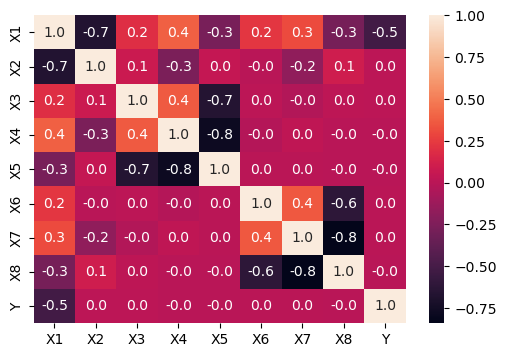

[('X1', 0.429489880213649), ('X8', 0.31901145615536025), ('X4', 0.3163901984059654), ('X5', 0.3089736284690783), ('X7', 0.30531752367756965), ('X3', 0.26361469337490206), ('X2', 0.26206371049527105), ('X6', 0.25082064648896907)]
{'target': 'Y', 'features_idx': [0, 1, 2, 3, 4, 5, 6, 7], 'split_col_idx': [0, 7, 3, 4, 6, 2, 1, 5], 'ms_col_idx': [0, 1, 2, 3, 4, 5, 6, 7], 'obs_col_idx': [1, 4, 7], 'num_cols': 8, 'task_type': 'classification', 'clf_type': 'binary-class', 'data_type': 'tabular'}


In [10]:
df, data_config = load_data('codrna')
show_heatmap(df,  figsize = (6,4))
print(avg_correlation(df))
print(data_config)

In [30]:
df[data_config['target']].value_counts()

Y
0    13372
1     6628
Name: count, dtype: int64

In [38]:
avg_cols = avg_correlation(df)
avg_cols = [col[0] for col in avg_cols]
split_col_idx = [df.columns.tolist().index(col) for col in avg_cols]
split_col_idx

In [63]:
cl = kbins(df, data_config)
np.unique(cl, return_counts=True)

In [41]:
data_config

## HHP

In [8]:

############################################################################################################
# Load data
# members
df_members = pd.read_csv('./data/HHP_herritage_health/Members.csv')
df_members['Sex'] = df_members['Sex'].map({'M': 1, 'F': 0})
df_members['AgeAtFirstClaim'] = df_members['AgeAtFirstClaim'].map({
    '0-9': 5,
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80+': 90
})

# drug and lab
df_drug = pd.read_csv('./data/HHP_herritage_health/DrugCount.csv')
df_drug['DrugCount'] = df_drug['DrugCount'].map({'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7+': 10})
df_lab = pd.read_csv('./data/HHP_herritage_health/LabCount.csv')
df_lab['LabCount'] = df_lab['LabCount'].map(
    {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10+': 12}
)

# days
df_days_y2 = pd.read_csv('./data/HHP_herritage_health/DaysInHospital_Y2.csv')
df_days_y2['Year'] = 'Y1'
df_days_y3 = pd.read_csv('./data/HHP_herritage_health/DaysInHospital_Y3.csv')
df_days_y3['Year'] = 'Y2'

df_days = pd.concat([df_days_y2, df_days_y3])

df_claims = pd.read_csv('./data/HHP_herritage_health/Claims.csv')

# divide by provider
# providers = df_claims['ProviderID'].value_counts().iloc[: 10].index.tolist()
# df_claims = df_claims[df_claims['ProviderID'].isin(providers)]
# print(df_claims.shape)

df_claims = pd.merge(df_claims, df_members, on='MemberID', how='left')
df_claims = pd.merge(df_claims, df_drug, on=['MemberID', 'Year', 'DSFS'], how='left')
df_claims = pd.merge(df_claims, df_lab, on=['MemberID', 'Year', 'DSFS'], how='left')
df_claims = pd.merge(df_claims, df_days, on=['MemberID', 'Year'], how='left')
df_claims = df_claims[df_claims['DaysInHospital'].notna()]
print(df_claims.shape)

#################################################################################################################
# Feature engineering
# drop missing age and sex
df_claims = df_claims[df_claims['AgeAtFirstClaim'].notna()].copy()
df_claims = df_claims[df_claims['Sex'].notna()].copy()
df_claims = df_claims[df_claims['DSFS'].notna()].copy()

# transform categorical columns
def transform1(row):
    if pd.isna(row):
        return 'None'
    else:
        return str(int(row))
    
df_claims['ProviderID'] = df_claims['ProviderID'].map(transform1)
df_claims['Vendor'] = df_claims['Vendor'].map(transform1)
df_claims['PCP'] = df_claims['PCP'].map(transform1)

# handle missing values for categorical columns
df_claims['ProcedureGroup'] = df_claims['ProcedureGroup'].fillna('None', inplace=False)
df_claims['Specialty'] = df_claims['Specialty'].fillna('None', inplace=False)
df_claims['PrimaryConditionGroup'] = df_claims['PrimaryConditionGroup'].fillna('None', inplace=False)
df_claims['PlaceSvc'] = df_claims['PlaceSvc'].fillna('None', inplace=False)

# encode number of columns
df_claims['CharlsonIndex'] = df_claims['CharlsonIndex'].map({'0': 0, '1-2': 1.5, '3-4': 3.5, '5+': 7})
df_claims['PayDelay'] = df_claims['PayDelay'].apply(lambda row: int(row) if row != '162+' else 200)
df_claims['LengthOfStay'] = df_claims['LengthOfStay'].map({
    '1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6, '1- 2 weeks': 10, '2- 4 weeks': 21, '4- 8 weeks': 42,
})
df_claims['DSFS'] = df_claims['DSFS'].map({
    '0- 1 month': 1, '1- 2 months': 2, '2- 3 months': 3, '3- 4 months': 4, '4- 5 months': 5, '5- 6 months': 6, 
    '6- 7 months': 7, '7- 8 months': 8, '8- 9 months': 9, '9-10 months': 10, '10-11 months': 11, '11-12 months': 12
})

# filter all large claims
df_claims = df_claims[df_claims['DaysInHospital'] > 0].copy()
print(df_claims.shape)

# fill mean values for drug and lab counts
df_claims['DrugCount'] = df_claims['DrugCount'].fillna(df_claims['DrugCount'].mean(), inplace=False)
df_claims['LabCount'] = df_claims['LabCount'].fillna(df_claims['LabCount'].mean(), inplace=False)

# drop length of stay
df_claims = df_claims.drop(columns=['LengthOfStay'])

#########################################################################################################################
# Feature selection
# numerical features
def feature_agg(df, key):
    ret = df.groupby(['MemberID', 'Year']).agg(
        **{
            key+'_mean': pd.NamedAgg(column=key, aggfunc='mean'),
            key+'_std': pd.NamedAgg(column=key, aggfunc='std'),
            key+'_max': pd.NamedAgg(column=key, aggfunc='max'),
            key+'_min': pd.NamedAgg(column=key, aggfunc='min'),
        }
    )

    ret[f'{key}_range'] = ret[f'{key}_max'] - ret[f'{key}_min']
    ret = ret.reset_index()
    ret = ret.drop(columns=[f'{key}_min'])
    
    df = pd.merge(df, ret, on=['MemberID', 'Year'], how='left')
    df = df.drop(columns=[key])
    
    return df

df_claims = feature_agg(df_claims, 'DSFS')
df_claims = feature_agg(df_claims, 'PayDelay')
df_claims = feature_agg(df_claims, 'CharlsonIndex')
df_claims = feature_agg(df_claims, 'DrugCount')
df_claims = feature_agg(df_claims, 'LabCount')

def feature_agg2(df, key):
    df = df.groupby(['MemberID', 'Year']).agg(key).nunique().reset_index(name = key+'_counts')
    df = pd.merge(df_claims, df, on = ['MemberID', 'Year'], how = 'left')
    return df

df_claims = feature_agg2(df_claims, 'ProviderID')
df_claims = feature_agg2(df_claims, 'Vendor')
df_claims = feature_agg2(df_claims, 'PCP')
df_claims = feature_agg2(df_claims, 'Specialty')
df_claims = feature_agg2(df_claims, 'PlaceSvc')
df_claims = feature_agg2(df_claims, 'PrimaryConditionGroup')
df_claims = feature_agg2(df_claims, 'ProcedureGroup')
ret = df_claims.groupby(['MemberID', 'Year']).size().reset_index(name = 'claim_counts')
df_claims = pd.merge(df_claims, ret, on = ['MemberID', 'Year'], how = 'left')

df_claims.fillna(0, inplace=True)

# categoorical one-hot features
top_k = 2
for col in ['Specialty', 'PlaceSvc', 'PrimaryConditionGroup', 'ProcedureGroup']:
    top_k_cols = pd.get_dummies(df_claims[col]).corrwith(df_claims['DaysInHospital']).abs().sort_values(ascending = False)[:top_k]
    dummies = pd.get_dummies(df_claims[col])[top_k_cols.index]
    dummies.columns = [f'{col}_{idx}' for idx in range(len(dummies.columns))]
    df_claims = pd.concat([df_claims, dummies], axis = 1)
    df_claims.drop(columns = [col], inplace = True)
    
df_claims = df_claims.drop(columns = ['MemberID', 'ProviderID', 'Vendor', 'PCP', 'Year'])

#########################################################################################################################
# Split data
# columns
num_cols = ['AgeAtFirstClaim']
for col in ['CharlsonIndex', 'PayDelay', 'DrugCount', 'LabCount', 'DSFS']:
    num_cols += [f'{col}_mean', f'{col}_std', f'{col}_max', f'{col}_range']
for col in ['ProviderID', 'Vendor', 'PCP', 'Specialty', 'PlaceSvc', 'PrimaryConditionGroup', 'ProcedureGroup', 'claim']:
    num_cols += [f'{col}_counts']
print(len(num_cols))

cat_cols = ['Sex', 'SupLOS', 'ClaimsTruncated']
cat_cols += [f'{col}_{idx}' for col in ['Specialty', 'PlaceSvc', 'PrimaryConditionGroup', 'ProcedureGroup'] for idx in range(top_k)]
print(len(cat_cols))

target = 'DaysInHospital'

# sample data
df_claims_sample = df_claims.sample(n = 20000, random_state=42)

# standardize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_claims_sample[num_cols] = scaler.fit_transform(df_claims_sample[num_cols])
scaler = MinMaxScaler()
df_claims_sample[num_cols] = scaler.fit_transform(df_claims_sample[num_cols])

# reorder target to be num cols, cat cols and target
df_claims_sample = df_claims_sample[num_cols + cat_cols + [target]]

print(df_claims_sample.shape)

data = df_claims_sample

avg_correlation_cols = avg_correlation(data)
avg_correlation_cols = [col[0] for col in avg_correlation_cols if col[0] in num_cols]
avg_correlation_cols = [col for col in avg_correlation_cols][:int(data.shape[1]*0.3)]

# data config
data_config = {
    'target': target,
    'features_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] != target],
    'split_col_idx': [data.columns.tolist().index(col) for col in avg_correlation_cols],
    'ms_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in num_cols],
    'obs_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in cat_cols],
    "num_cols": len(num_cols),
    'task_type': 'regression',
    'clf_type': 'none',
    'data_type': 'tabular'
}

(1764556, 20)
(207078, 20)
29
11
(20000, 41)


In [11]:

############################################################################################################
# Load data
# members
df_members = pd.read_csv('./data/HHP_herritage_health/Members.csv')
df_members['Sex'] = df_members['Sex'].map({'M': 1, 'F': 0})
df_members['AgeAtFirstClaim'] = df_members['AgeAtFirstClaim'].map({
    '0-9': 5,
    '10-19': 15,
    '20-29': 25,
    '30-39': 35,
    '40-49': 45,
    '50-59': 55,
    '60-69': 65,
    '70-79': 75,
    '80+': 90
})

# drug and lab
df_drug = pd.read_csv('./data/HHP_herritage_health/DrugCount.csv')
df_drug['DrugCount'] = df_drug['DrugCount'].map({'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7+': 10})
df_lab = pd.read_csv('./data/HHP_herritage_health/LabCount.csv')
df_lab['LabCount'] = df_lab['LabCount'].map(
    {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10+': 12}
)

# days
df_days_y2 = pd.read_csv('./data/HHP_herritage_health/DaysInHospital_Y2.csv')
df_days_y2['Year'] = 'Y1'
df_days_y3 = pd.read_csv('./data/HHP_herritage_health/DaysInHospital_Y3.csv')
df_days_y3['Year'] = 'Y2'

df_days = pd.concat([df_days_y2, df_days_y3])

df_claims = pd.read_csv('./data/HHP_herritage_health/Claims.csv')

# divide by provider
# providers = df_claims['ProviderID'].value_counts().iloc[: 10].index.tolist()
# df_claims = df_claims[df_claims['ProviderID'].isin(providers)]
# print(df_claims.shape)

df_claims = pd.merge(df_claims, df_members, on='MemberID', how='left')
df_claims = pd.merge(df_claims, df_drug, on=['MemberID', 'Year', 'DSFS'], how='left')
df_claims = pd.merge(df_claims, df_lab, on=['MemberID', 'Year', 'DSFS'], how='left')
df_claims = pd.merge(df_claims, df_days, on=['MemberID', 'Year'], how='left')
df_claims = df_claims[df_claims['DaysInHospital'].notna()]
print(df_claims.shape)

#################################################################################################################
# Feature engineering
# drop missing age and sex
df_claims = df_claims[df_claims['AgeAtFirstClaim'].notna()].copy()
df_claims = df_claims[df_claims['Sex'].notna()].copy()
df_claims = df_claims[df_claims['DSFS'].notna()].copy()

# transform categorical columns
def transform1(row):
    if pd.isna(row):
        return 'None'
    else:
        return str(int(row))
    
df_claims['ProviderID'] = df_claims['ProviderID'].map(transform1)
df_claims['Vendor'] = df_claims['Vendor'].map(transform1)
df_claims['PCP'] = df_claims['PCP'].map(transform1)

# handle missing values for categorical columns
df_claims['ProcedureGroup'] = df_claims['ProcedureGroup'].fillna('None', inplace=False)
df_claims['Specialty'] = df_claims['Specialty'].fillna('None', inplace=False)
df_claims['PrimaryConditionGroup'] = df_claims['PrimaryConditionGroup'].fillna('None', inplace=False)
df_claims['PlaceSvc'] = df_claims['PlaceSvc'].fillna('None', inplace=False)

# encode number of columns
df_claims['CharlsonIndex'] = df_claims['CharlsonIndex'].map({'0': 0, '1-2': 1.5, '3-4': 3.5, '5+': 7})
df_claims['PayDelay'] = df_claims['PayDelay'].apply(lambda row: int(row) if row != '162+' else 200)
df_claims['LengthOfStay'] = df_claims['LengthOfStay'].map({
    '1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6, '1- 2 weeks': 10, '2- 4 weeks': 21, '4- 8 weeks': 42,
})
df_claims['DSFS'] = df_claims['DSFS'].map({
    '0- 1 month': 1, '1- 2 months': 2, '2- 3 months': 3, '3- 4 months': 4, '4- 5 months': 5, '5- 6 months': 6, 
    '6- 7 months': 7, '7- 8 months': 8, '8- 9 months': 9, '9-10 months': 10, '10-11 months': 11, '11-12 months': 12
})

# filter all large claims
df_claims = df_claims[df_claims['DaysInHospital'] > 0].copy()
print(df_claims.shape)

# fill mean values for drug and lab counts
df_claims['DrugCount'] = df_claims['DrugCount'].fillna(df_claims['DrugCount'].mean(), inplace=False)
df_claims['LabCount'] = df_claims['LabCount'].fillna(df_claims['LabCount'].mean(), inplace=False)

# drop length of stay
df_claims = df_claims.drop(columns=['LengthOfStay'])

#########################################################################################################################
# Feature selection
# numerical features
def feature_agg(df, key):
    ret = df.groupby(['MemberID', 'Year']).agg(
        **{
            key+'_mean': pd.NamedAgg(column=key, aggfunc='mean'),
            key+'_std': pd.NamedAgg(column=key, aggfunc='std'),
            key+'_max': pd.NamedAgg(column=key, aggfunc='max'),
            key+'_min': pd.NamedAgg(column=key, aggfunc='min'),
        }
    )

    ret[f'{key}_range'] = ret[f'{key}_max'] - ret[f'{key}_min']
    ret = ret.reset_index()
    ret = ret.drop(columns=[f'{key}_min'])
    
    df = pd.merge(df, ret, on=['MemberID', 'Year'], how='left')
    df = df.drop(columns=[key])
    
    return df

df_claims = feature_agg(df_claims, 'DSFS')
df_claims = feature_agg(df_claims, 'PayDelay')
df_claims = feature_agg(df_claims, 'CharlsonIndex')
df_claims = feature_agg(df_claims, 'DrugCount')
df_claims = feature_agg(df_claims, 'LabCount')

def feature_agg2(df, key):
    df = df.groupby(['MemberID', 'Year']).agg(key).nunique().reset_index(name = key+'_counts')
    df = pd.merge(df_claims, df, on = ['MemberID', 'Year'], how = 'left')
    return df

df_claims = feature_agg2(df_claims, 'ProviderID')
df_claims = feature_agg2(df_claims, 'Vendor')
df_claims = feature_agg2(df_claims, 'PCP')
df_claims = feature_agg2(df_claims, 'Specialty')
df_claims = feature_agg2(df_claims, 'PlaceSvc')
df_claims = feature_agg2(df_claims, 'PrimaryConditionGroup')
df_claims = feature_agg2(df_claims, 'ProcedureGroup')
ret = df_claims.groupby(['MemberID', 'Year']).size().reset_index(name = 'claim_counts')
df_claims = pd.merge(df_claims, ret, on = ['MemberID', 'Year'], how = 'left')

df_claims.fillna(0, inplace=True)

# categoorical one-hot features
top_k = 2
for col in ['Specialty', 'PlaceSvc', 'PrimaryConditionGroup', 'ProcedureGroup']:
    top_k_cols = pd.get_dummies(df_claims[col]).corrwith(df_claims['DaysInHospital']).abs().sort_values(ascending = False)[:top_k]
    dummies = pd.get_dummies(df_claims[col])[top_k_cols.index]
    dummies.columns = [f'{col}_{idx}' for idx in range(len(dummies.columns))]
    df_claims = pd.concat([df_claims, dummies], axis = 1)
    df_claims.drop(columns = [col], inplace = True)
    
#df_claims = df_claims.drop(columns = ['MemberID', 'Vendor', 'PCP', 'Year'])

# #########################################################################################################################
# # Split data
# # columns
# num_cols = ['AgeAtFirstClaim']
# for col in ['CharlsonIndex', 'PayDelay', 'DrugCount', 'LabCount', 'DSFS']:
#     num_cols += [f'{col}_mean', f'{col}_std', f'{col}_max', f'{col}_range']
# for col in ['ProviderID', 'Vendor', 'PCP', 'Specialty', 'PlaceSvc', 'PrimaryConditionGroup', 'ProcedureGroup', 'claim']:
#     num_cols += [f'{col}_counts']
# print(len(num_cols))

# cat_cols = ['Sex', 'SupLOS', 'ClaimsTruncated']
# cat_cols += [f'{col}_{idx}' for col in ['Specialty', 'PlaceSvc', 'PrimaryConditionGroup', 'ProcedureGroup'] for idx in range(top_k)]
# print(len(cat_cols))

# target = 'DaysInHospital'

# # sample data
# df_claims_sample = df_claims.sample(n = 20000, random_state=42)

# # standardize
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = StandardScaler()
# df_claims_sample[num_cols] = scaler.fit_transform(df_claims_sample[num_cols])
# scaler = MinMaxScaler()
# df_claims_sample[num_cols] = scaler.fit_transform(df_claims_sample[num_cols])

# # reorder target to be num cols, cat cols and target
# df_claims_sample = df_claims_sample[num_cols + cat_cols + [target]]

# print(df_claims_sample.shape)

# data = df_claims_sample

# avg_correlation_cols = avg_correlation(data)
# avg_correlation_cols = [col[0] for col in avg_correlation_cols if col[0] in num_cols]
# avg_correlation_cols = [col for col in avg_correlation_cols][:int(data.shape[1]*0.3)]

# # data config
# data_config = {
#     'target': target,
#     'features_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] != target],
#     'split_col_idx': [data.columns.tolist().index(col) for col in avg_correlation_cols],
#     'ms_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in num_cols],
#     'obs_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in cat_cols],
#     "num_cols": len(num_cols),
#     'task_type': 'regression',
#     'clf_type': 'none',
#     'data_type': 'tabular'
# }

(1764556, 20)
(207078, 20)


In [18]:
df_claims.shape

(207078, 46)

In [27]:
df_claims['ProviderID'].value_counts()[:10]

ProviderID
7053364    31689
1076052    10577
4107701     9728
321261      5758
9585773     2639
4062524     2389
5145548     2330
8889271     1924
4086852     1745
5804349     1558
Name: count, dtype: int64

<Axes: >

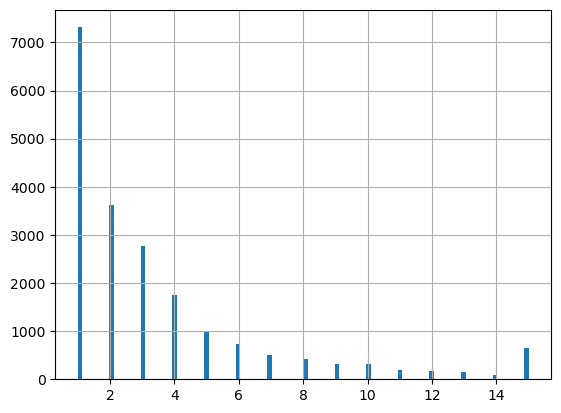

In [10]:
data[target].hist(bins = 100)

In [1]:
data_config

NameError: name 'data_config' is not defined

In [136]:
import json
data.to_csv('./data/HHP_herritage_health/data_cleaned.csv', index=False)
with open('./data/HHP_herritage_health/data_config.json', 'w') as f:
    json.dump(data_config, f)

In [132]:
data.shape

In [133]:
data_config['split_col_idx']

In [134]:
avg_correlation(data[num_cols])

In [135]:
data[num_cols].corrwith(data['DaysInHospital']).abs().sort_values(ascending = False)

In [6]:
data_config

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = df_claims_sample[num_cols]
y = df_claims_sample[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

In [56]:
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10]).fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_log_error(y_test, y_pred)))

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

model = MLPRegressor(hidden_layer_sizes=(128, 128), max_iter=1000, alpha=0.5, random_state=42, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

## California Housing

In [34]:
from sklearn.preprocessing import PowerTransformer
def outlier_remove_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]
    return data

def convert_gaussian(data, col):
    pt = PowerTransformer()
    data[col] = pt.fit_transform(data[col].values.reshape(-1, 1)).flatten()
    return data

In [35]:
from sklearn.datasets import fetch_california_housing, fetch_kddcup99
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
housing = fetch_california_housing()
data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
target_col = 'MedHouseVal'
data[target_col] = housing.target

# drop missing values
print(data.shape)
data = data.dropna()
print(data.shape)

# remove outliers
data = outlier_remove_iqr(data, 'AveRooms')
data = outlier_remove_iqr(data, 'AveBedrms')
data = outlier_remove_iqr(data, 'Population')
data = outlier_remove_iqr(data, 'AveOccup')

# gaussian transform
data = convert_gaussian(data, 'MedInc')

num_cols = data.columns.tolist()[:-1]

scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

data[num_cols] = scaler.fit_transform(data[num_cols])
print(data.shape)

data_config = {
    'target': target_col,
    'features_idx': list(range(len(data.columns)-1)),
    'split_col_idx': [0, 2, 5],
    'ms_col_idx': list(range(len(num_cols))),
    'obs_col_idx': [4, 7],
    'num_cols': len(num_cols),
    'task_type': 'regression',
    'clf_type': 'none',
    'data_type': 'tabular'
}

print(data_config)

(20640, 9)
(20640, 9)
(17309, 9)
{'target': 'MedHouseVal', 'features_idx': [0, 1, 2, 3, 4, 5, 6, 7], 'split_col_idx': [0, 2, 5], 'ms_col_idx': [0, 1, 2, 3, 4, 5, 6, 7], 'obs_col_idx': [4, 7], 'num_cols': 8, 'task_type': 'regression', 'clf_type': 'none', 'data_type': 'tabular'}


In [36]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [13]:
data[target_col].hist(bins=100)

In [74]:
data.to_csv('./data/california/data_cleaned.csv', index=False)
import json
with open('./data/california/data_config.json', 'w') as f:
    json.dump(data_config, f)

In [62]:
data[num_cols].corrwith(data[target_col]).abs().sort_values(ascending = False)

In [63]:
avg_correlation(data[num_cols])

In [71]:
show_heatmap(data[num_cols])

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = data[num_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

model = MLPRegressor(hidden_layer_sizes=(128, 128), max_iter=1000, alpha=0.5, random_state=42, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

## Dvisits

In [31]:
! pip install pyreadr

In [32]:
def convert_gaussian(data, col):
    pt = PowerTransformer()
    data[col] = pt.fit_transform(data[col].values.reshape(-1, 1)).flatten()
    return data

In [33]:
import pyreadr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
result = pyreadr.read_r('./data/dvisits/dvisits.rda')  
data = result['dvisits']
data = data.drop(['prescrib', 'nonpresc', 'agesq'], axis=1)
print(data.shape)

num_cols = ['age', 'income', 'illness', 'actdays', 'hscore', 'hospadmi', 'hospdays']
cat_cols = ['sex', 'levyplus', 'freepoor', 'freerepa', 'chcond1', 'chcond2']
target_col = 'medicine'

data = data[num_cols + cat_cols + [target_col]]

scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])
data[num_cols] = scaler.fit_transform(data[num_cols])
print(data.shape)

data_config = {
    'target': target_col,
    'features_idx': list(range(len(data.columns)-1)),
    'split_col_idx': [0, 2, 1],
    'ms_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in num_cols],
    'obs_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in cat_cols],
    'num_cols': len(num_cols),
    'task_type': 'regression',
    'clf_type': 'none',
    'data_type': 'tabular'
}

print(data_config)


(5190, 16)
(5190, 14)
{'target': 'medicine', 'features_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'split_col_idx': [0, 2, 1], 'ms_col_idx': [0, 1, 2, 3, 4, 5, 6], 'obs_col_idx': [7, 8, 9, 10, 11, 12], 'num_cols': 7, 'task_type': 'regression', 'clf_type': 'none', 'data_type': 'tabular'}


In [16]:
data.hist(bins=30, figsize=(10, 8))
plt.show()

In [17]:
data[target_col].hist(bins=100)

In [70]:
data.columns

In [14]:
data.to_csv('./data/dvisits/data_cleaned.csv', index=False)
import json
with open('./data/dvisits/data_config.json', 'w') as f:
    json.dump(data_config, f)

In [89]:
data.corrwith(data[target_col]).abs().sort_values(ascending = False)

In [90]:
avg_correlation(data)

In [71]:
show_heatmap(data.corr().abs())

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = data[cat_cols]
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

model = MLPRegressor(hidden_layer_sizes=(128, 128), max_iter=1000, alpha=0.5, random_state=42, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

## Vehicle

In [11]:
import scipy.io
from collections import Counter

In [12]:
mat = scipy.io.loadmat('./data/vehicle/vehicle.mat')
raw_x, raw_y = mat['X'], mat['Y']  # y = {-1, 1}
assert len(raw_x) == len(raw_y)
num_clients = len(raw_x)

dataset = []
for i in range(num_clients):
    features, labels = raw_x[i][0], raw_y[i][0].flatten()
    print(raw_x[i][0].shape, raw_y[i][0].shape)
    assert len(features) == len(labels)
    counter = Counter(labels)
    print(f'Client {i}:', counter, counter[1] / len(labels))
    dataset.append((features, labels))

positive_counts = [np.count_nonzero(labels + 1) for feats, labels in dataset]
positive_percentages = [np.count_nonzero(labels + 1) / len(labels) * 100
                      for feats, labels in dataset]

(2578, 100) (2578, 1)
Client 0: Counter({-1: 1296, 1: 1282}) 0.4972847168347556
(1511, 100) (1511, 1)
Client 1: Counter({1: 787, -1: 724}) 0.5208471211118465
(1519, 100) (1519, 1)
Client 2: Counter({-1: 773, 1: 746}) 0.4911125740618828
(1425, 100) (1425, 1)
Client 3: Counter({1: 760, -1: 665}) 0.5333333333333333
(1375, 100) (1375, 1)
Client 4: Counter({1: 738, -1: 637}) 0.5367272727272727
(1164, 100) (1164, 1)
Client 5: Counter({-1: 629, 1: 535}) 0.45962199312714774
(1683, 100) (1683, 1)
Client 6: Counter({1: 889, -1: 794}) 0.5282234105763518
(1735, 100) (1735, 1)
Client 7: Counter({1: 918, -1: 817}) 0.5291066282420749
(2000, 100) (2000, 1)
Client 8: Counter({-1: 1080, 1: 920}) 0.46
(1701, 100) (1701, 1)
Client 9: Counter({1: 920, -1: 781}) 0.5408583186360965
(1803, 100) (1803, 1)
Client 10: Counter({1: 1021, -1: 782}) 0.5662784248474765
(1803, 100) (1803, 1)
Client 11: Counter({1: 1050, -1: 753}) 0.5823627287853578
(1954, 100) (1954, 1)
Client 12: Counter({1: 1165, -1: 789}) 0.5962128

In [14]:
from FedImpute.evaluation.imp_quality_metrics import sliced_ws

dfs = []
for i in range(num_clients):
    df = pd.DataFrame(dataset[i][0])
    df['label'] = dataset[i][1]
    dfs.append(df)

final_df = pd.concat(dfs, axis=0)
split_indices = np.cumsum([df.shape[0] for df in dfs[:-1]])
print(split_indices)
print(final_df.shape)
final_df

[ 2578  4089  5608  7033  8408  9572 11255 12990 14990 16691 18494 20297
 22251 24451 26665 28579 30647 32609 34896 36898 38966 41414]
(43695, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.026949,1.000000,-0.014910,0.208563,0.158102,0.039686,-0.013324,-0.035059,-0.008879,0.017945,...,-0.027388,-0.027935,-0.029798,-0.029593,-0.024313,-0.028010,-0.030740,-0.029914,-0.019367,-1
1,-0.106449,-0.107161,-0.106211,-0.093109,-0.089204,-0.053121,-0.055886,0.311498,0.025716,0.378854,...,-0.046013,-0.045302,-0.046113,-0.046236,-0.046539,-0.046634,-0.046516,-0.046237,-0.046116,1
2,0.068916,0.184358,-0.019856,0.001814,-0.024399,-0.033020,0.069365,-0.030932,-0.004282,0.017541,...,-0.031355,-0.031642,-0.031202,-0.031654,-0.031389,-0.031540,-0.031497,-0.031652,-0.031654,1
3,0.274499,1.000000,0.422736,0.633032,0.060786,0.360998,0.142695,0.113041,-0.031728,0.199972,...,-0.025026,-0.024999,-0.025039,-0.024911,-0.024723,-0.025070,-0.024869,-0.024929,-0.025028,1
4,-0.111166,-0.046058,-0.082908,-0.064768,-0.066406,0.051794,-0.013235,0.246351,0.201614,1.000000,...,-0.067764,-0.067829,-0.067163,-0.066253,-0.068051,-0.067464,-0.067823,-0.067979,-0.068324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,-0.054384,0.411459,0.460583,1.000000,0.523396,0.646742,0.842954,0.387761,0.126027,0.748298,...,-0.043342,-0.049038,-0.013036,-0.043912,-0.049354,-0.048903,-0.046344,-0.050182,-0.050180,1
2277,-0.104634,-0.097174,-0.075234,0.156365,1.000000,0.016999,-0.030837,-0.040085,0.767782,0.056683,...,-0.038803,-0.043465,-0.040676,-0.037836,-0.040370,-0.040014,-0.043179,-0.041937,-0.032778,1
2278,-0.124715,-0.129231,-0.107464,-0.093799,-0.134166,-0.009438,1.000000,0.400542,0.147469,0.248877,...,-0.020933,-0.020823,-0.020908,-0.021151,-0.021393,-0.021440,-0.021418,-0.021369,-0.021349,1
2279,1.000000,0.158975,0.397572,0.120110,0.236249,0.107046,0.121457,-0.051589,-0.053459,-0.047078,...,-0.024518,-0.049658,-0.023918,-0.048912,-0.041751,-0.045467,-0.010284,-0.052035,-0.058835,-1


In [15]:
# Number of clients/dataframes
num_dfs = len(dfs)
distance_matrix = np.zeros((num_dfs, num_dfs))

for i in range(num_dfs):
    for j in range(i + 1, num_dfs):
        # Assuming sliced_ws expects numpy arrays; adapt if necessary
        dist = sliced_ws(dfs[i].to_numpy(), dfs[j].to_numpy())
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist

# Optional: Fill diagonal with zeros, assuming self-distance is zero
np.fill_diagonal(distance_matrix, 0)

# Average distance for each dataframe
average_distances = np.mean(distance_matrix, axis=1)

# Create an array of dataframe indices for reference
df_indices = np.arange(num_dfs)

# Combine indices and their corresponding average distances
average_distances_with_indices = list(zip(df_indices, average_distances))

# Sort the list of tuples by the average distance in descending order
sorted_by_distance = sorted(average_distances_with_indices, key=lambda x: x[1], reverse=True)

# Select the top 10
top_10_different = sorted_by_distance[:10]

# Unpack the top 10 list to separate indices and distances for clearer output
top_10_indices = [item[0] for item in top_10_different]
top_10_distances = [item[1] for item in top_10_different]

In [17]:
# feature selection
selected_dfs = [dfs[i] for i in top_10_indices]
#selected_dfs = [dfs[i] for i in range(len(dfs))]
selected_df = pd.concat(selected_dfs, axis=0)

from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier based on your task

# Assuming 'label' is your prediction target
X = selected_df.drop('label', axis=1)
y = selected_df['label']

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

sorted_features = [feature[0] for feature in sorted_features if feature[1] > 0.01]
print(sorted_features)

correlated_cols = selected_df.corrwith(selected_df['label']).abs().sort_values(ascending = False)[:30].index.tolist()
print(correlated_cols)

final_cols = list(set(sorted_features) | set(correlated_cols))
final_cols.remove('label')
print(final_cols)

[0, 4, 1, 5, 6, 52, 3, 54, 51, 58, 11, 53, 10, 40, 8, 7, 9]
['label', 40, 41, 42, 44, 47, 43, 48, 46, 49, 45, 39, 8, 37, 9, 10, 11, 7, 4, 38, 36, 1, 51, 35, 53, 6, 3, 54, 12, 58]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 58]


In [24]:
selected_dfs2 = dfs
selected_df = pd.concat(selected_dfs2, axis=0)
print(final_cols)

[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 58]


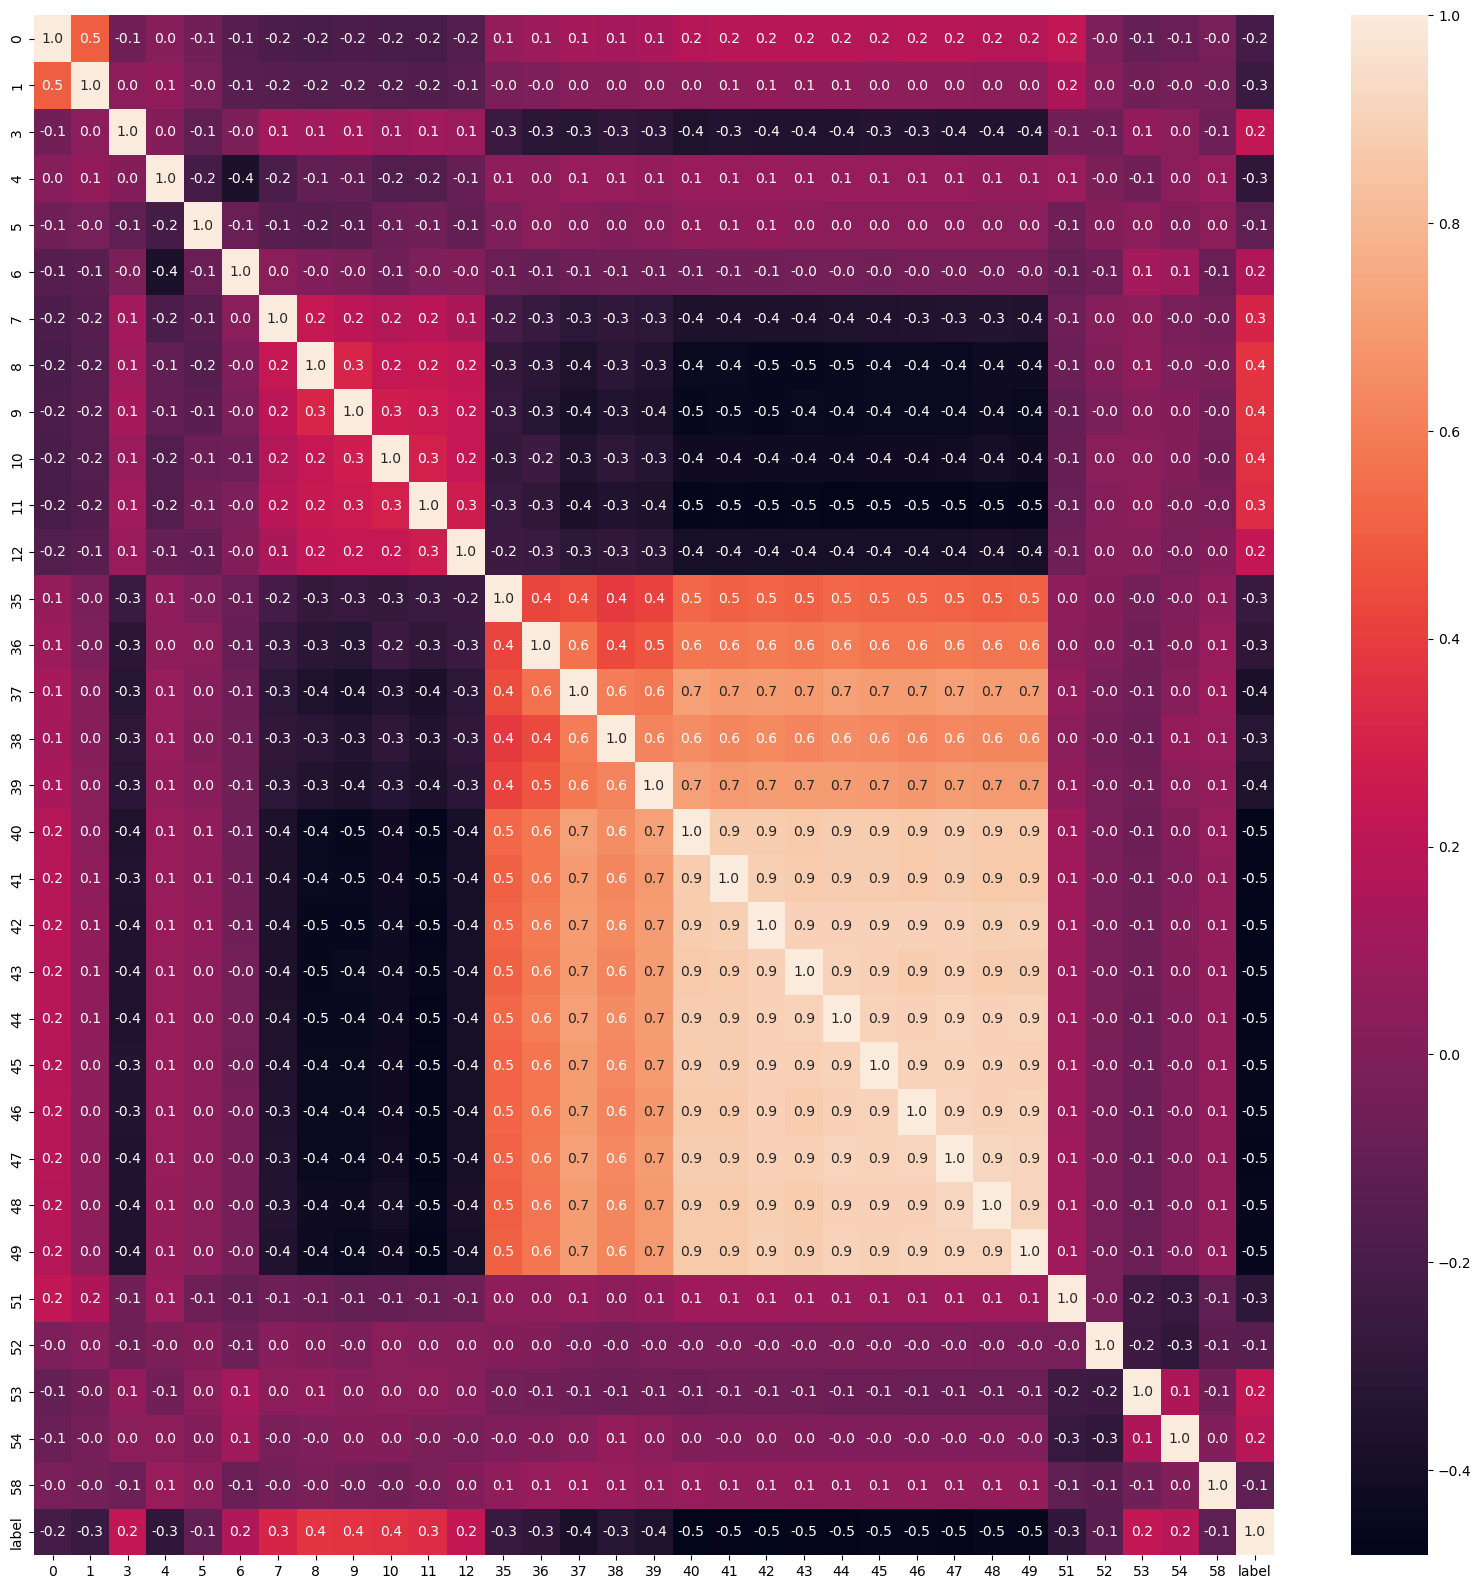

In [25]:
show_heatmap(selected_df[final_cols + ['label']], figsize=(20, 20))

In [26]:
data = selected_df[final_cols]
data = data.drop(columns = [41, 42, 43, 37, 44, 47, 46, 49, 45, 48])
print(data.shape)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# scaling
scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

cols = data.columns.tolist()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = cols)

# gaussian transform
from sklearn.preprocessing import QuantileTransformer

# Assuming 'df' is your DataFrame with binary features
gaussian_cols = [11, 35, 36, 38, 39, 40, 58]
transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_gaussianized = transformer.fit_transform(data[gaussian_cols])
df_gaussianized = pd.DataFrame(df_gaussianized, columns=gaussian_cols)
data = pd.concat([data.drop(columns = gaussian_cols), df_gaussianized], axis = 1)

(43695, 22)


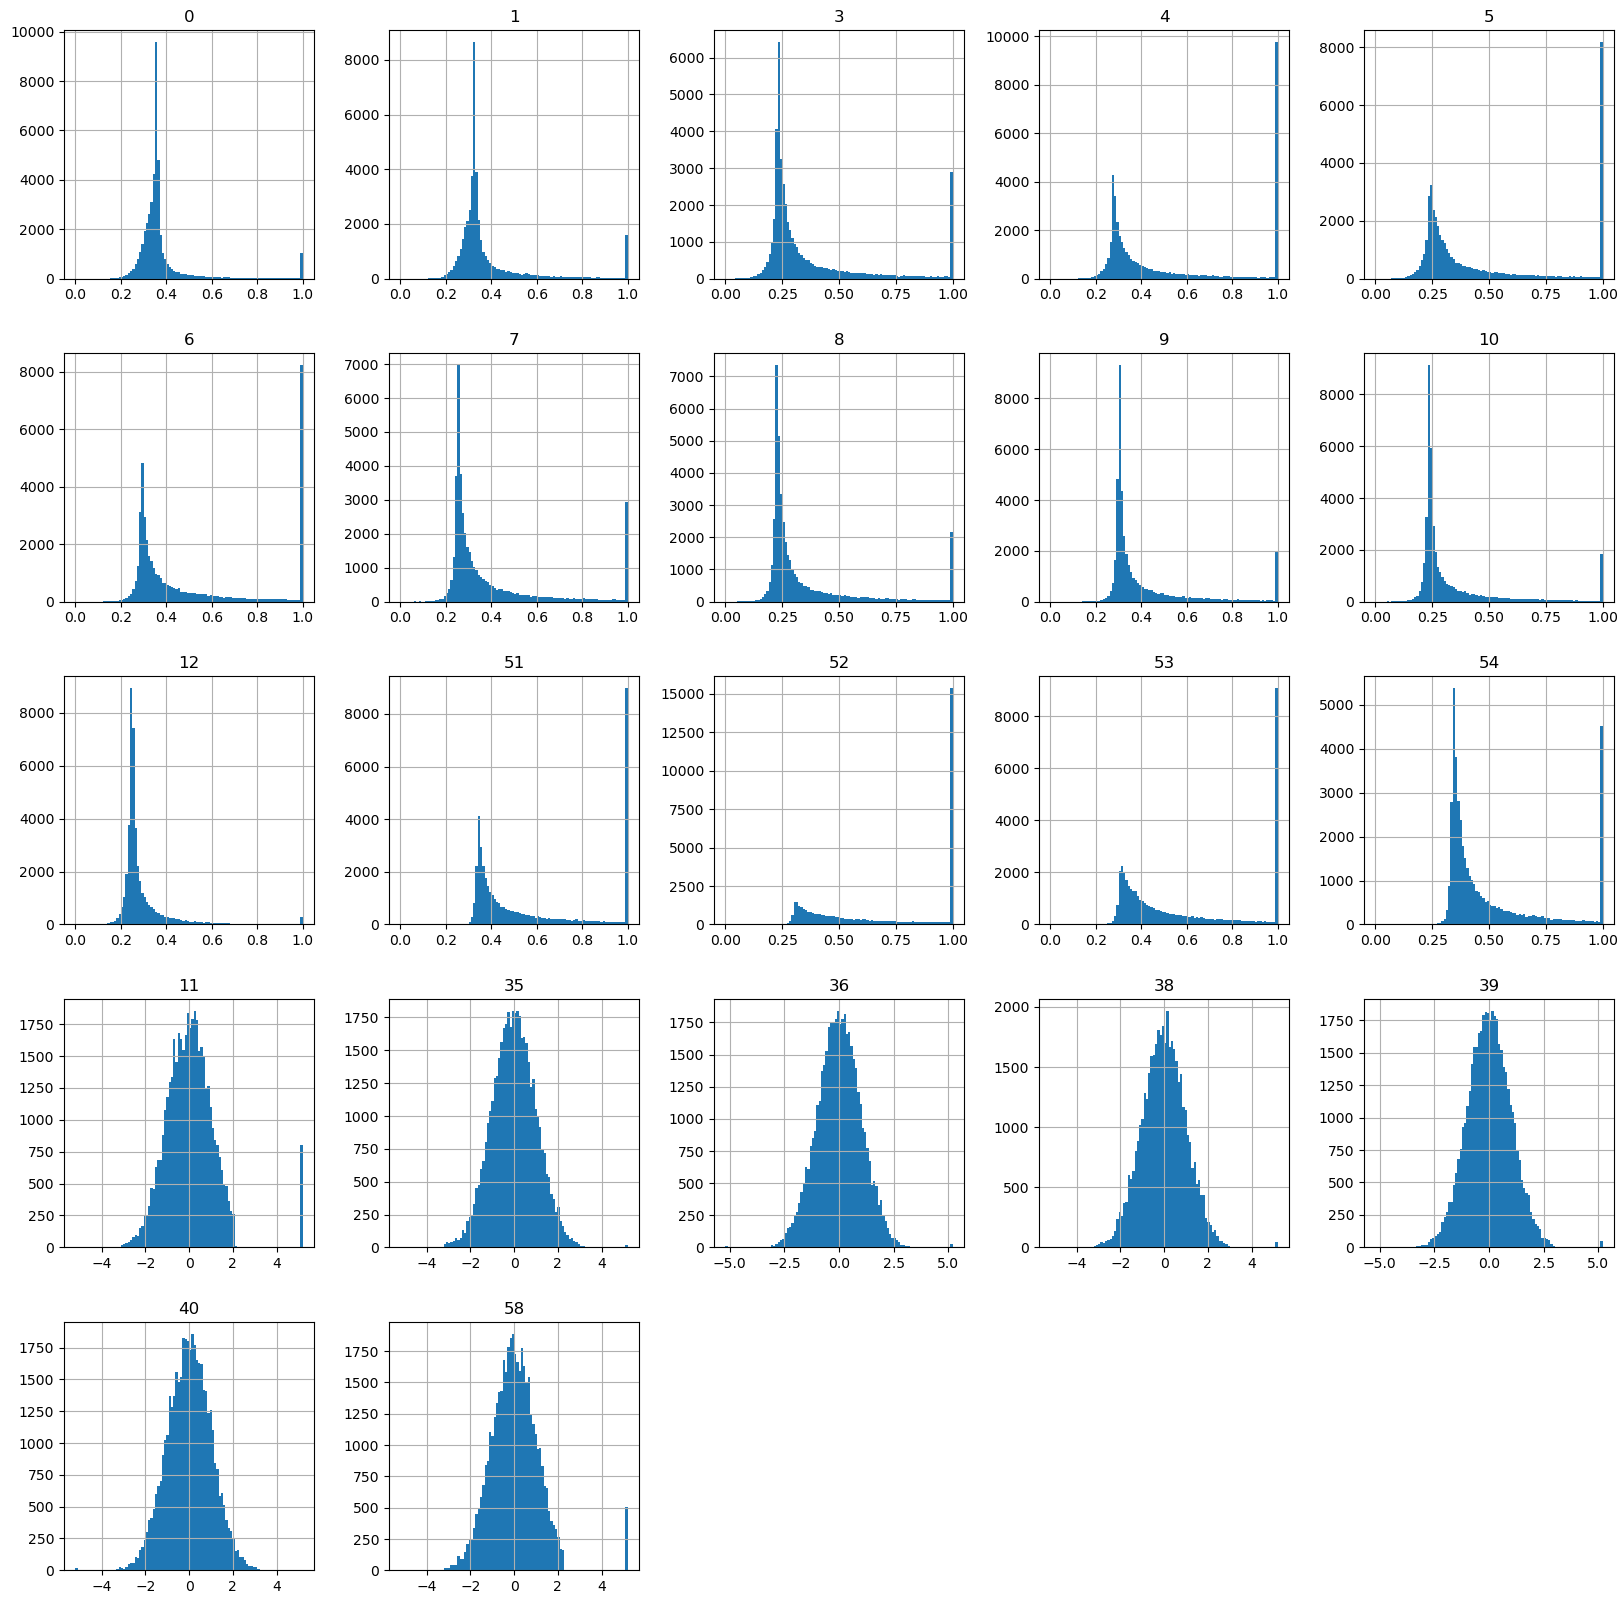

In [27]:
data.hist(figsize=(20, 20), bins = 100)
plt.show()

In [28]:
data = selected_df[final_cols]
data = data.drop(columns = [41, 42, 43, 37, 44, 47, 46, 49, 45, 48])
print(data.shape)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# gaussian transform
from sklearn.preprocessing import QuantileTransformer

# scaling
scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

cols = data.columns.tolist()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = cols)

# Assuming 'df' is your DataFrame with binary features
gaussian_cols = [11, 35, 36, 38, 39, 40, 58]
transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_gaussianized = transformer.fit_transform(data[gaussian_cols])
df_gaussianized = pd.DataFrame(df_gaussianized, columns=gaussian_cols)
data = pd.concat([data.drop(columns = gaussian_cols), df_gaussianized], axis = 1)

# scaling
scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

cols = data.columns.tolist()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = cols)

data.columns = [idx for idx, col in enumerate(data.columns)]
data['label'] = selected_df['label'].values
client_split_indices = np.cumsum([df.shape[0] for df in selected_dfs2[:-1]])
print(client_split_indices)
target_col = 'label'
data[target_col], codes = pd.factorize(data[target_col])
num_cols = data.columns.tolist()[:-1]
cat_cols = []

data_config = {
    'target': target_col,
    'features_idx': list(range(len(data.columns)-1)),
    'split_col_idx': [20, 19, 8, 3],
    'ms_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in num_cols],
    'obs_col_idx': [0, 13, 15],
    'num_cols': len(num_cols),
    'task_type': 'classification',
    'clf_type': 'binary',
    'data_type': 'tabular',
    'client_split_indices': client_split_indices.tolist()
}


(43695, 22)
[ 2578  4089  5608  7033  8408  9572 11255 12990 14990 16691 18494 20297
 22251 24451 26665 28579 30647 32609 34896 36898 38966 41414]


In [29]:
data[target_col].value_counts()

label
1    22841
0    20854
Name: count, dtype: int64

In [30]:
print(data_config)

{'target': 'label', 'features_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'split_col_idx': [20, 19, 8, 3], 'ms_col_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'obs_col_idx': [0, 13, 15], 'num_cols': 22, 'task_type': 'classification', 'clf_type': 'binary', 'data_type': 'tabular', 'client_split_indices': [2578, 4089, 5608, 7033, 8408, 9572, 11255, 12990, 14990, 16691, 18494, 20297, 22251, 24451, 26665, 28579, 30647, 32609, 34896, 36898, 38966, 41414]}


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': 'label'}>, <Axes: >, <Axes: >]],
      dtype=object)

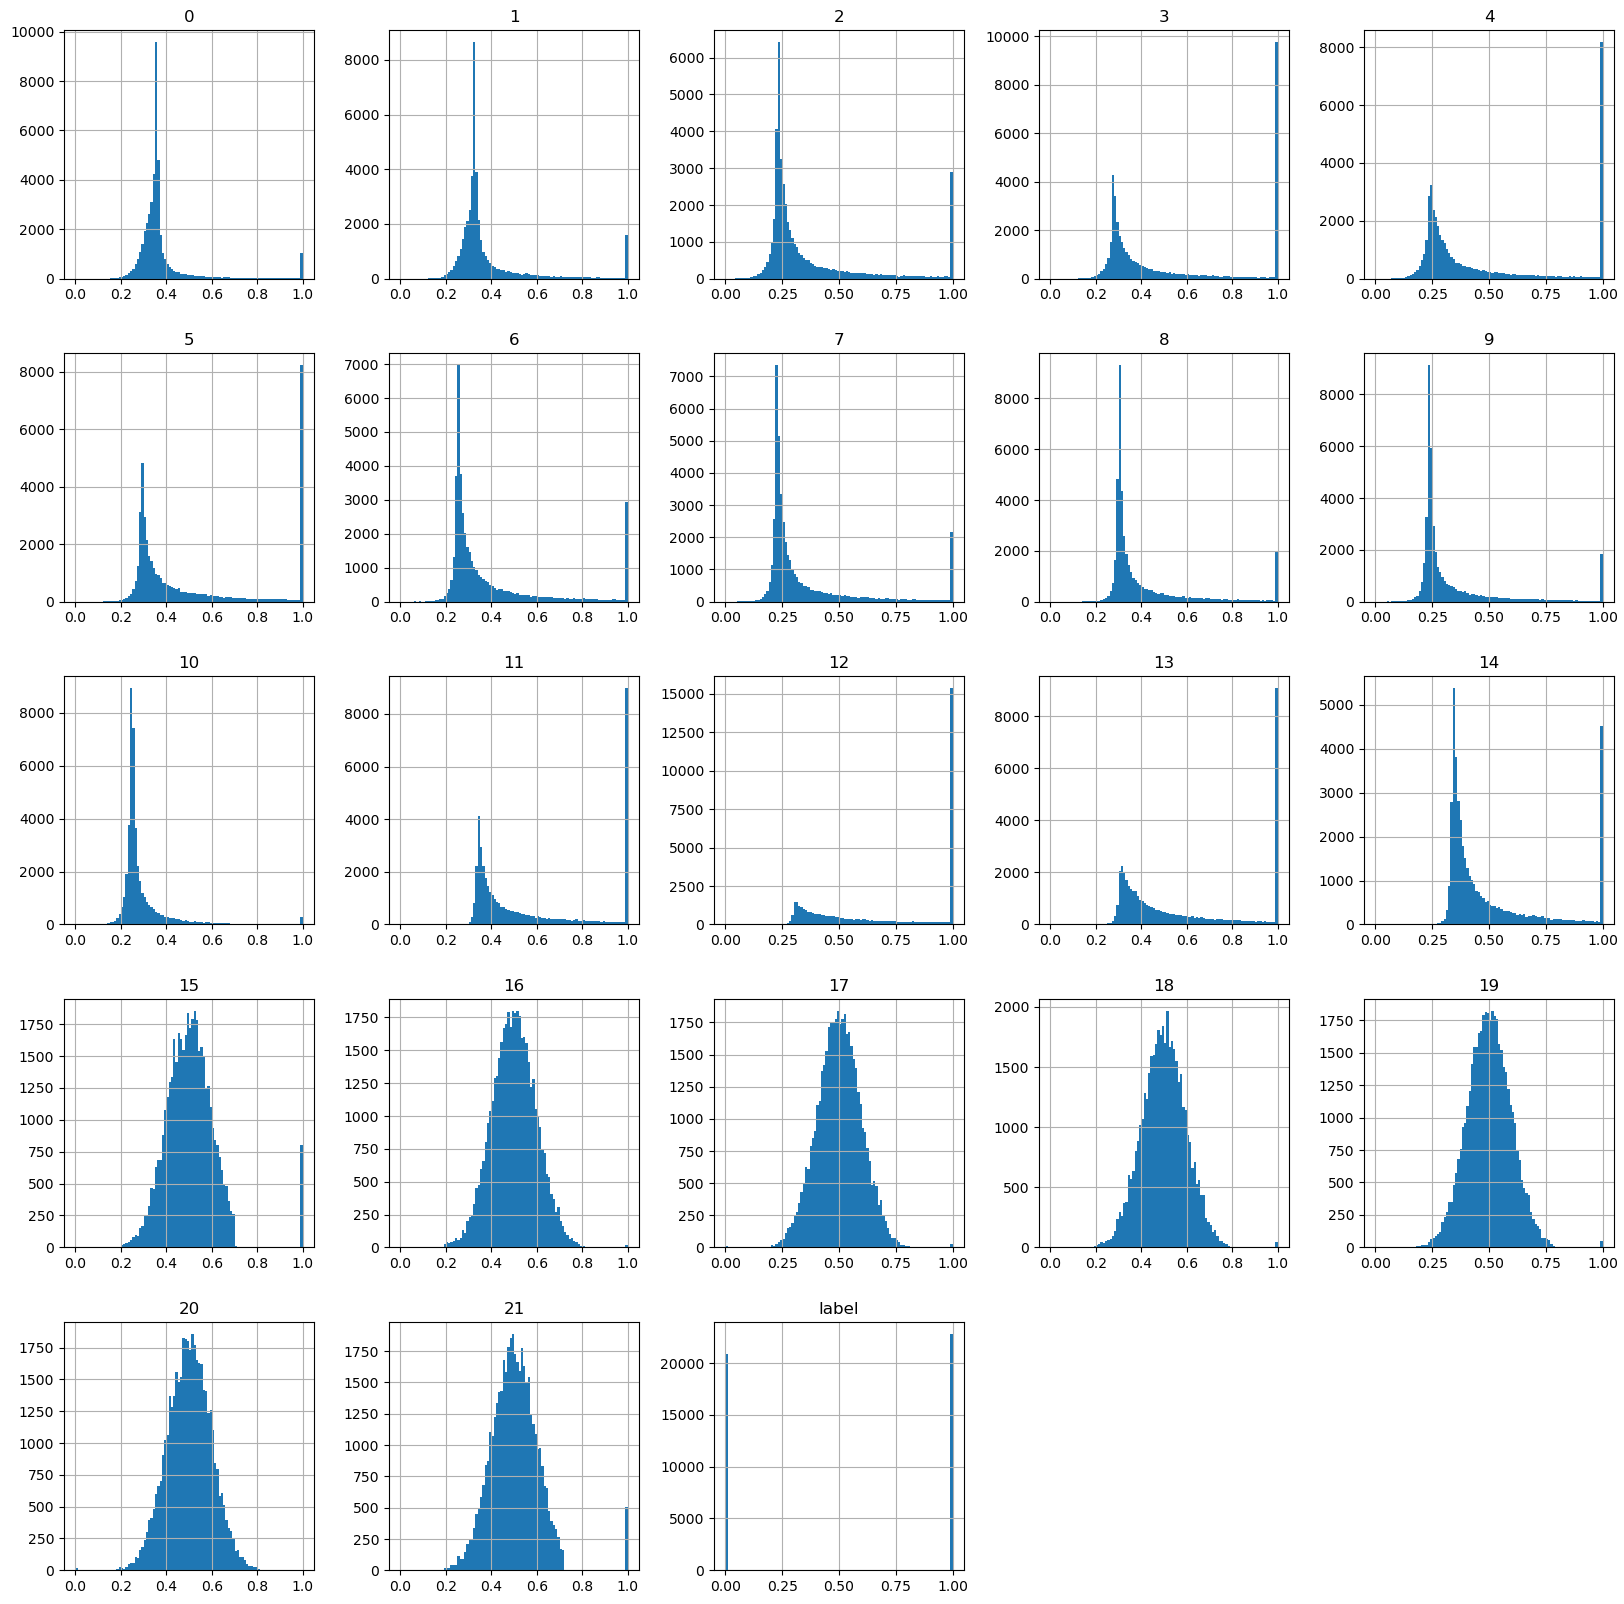

In [31]:
data.hist(figsize=(20, 20), bins = 100)

In [32]:
data.to_csv('./data/vehicle/data_cleaned_natural.csv', index=False)
import json
with open('./data/vehicle/data_config_natural.json', 'w') as f:
    json.dump(data_config, f)

In [18]:
show_heatmap(data, figsize=(10, 10))

In [79]:
avg_correlation(data)

In [76]:
show_heatmap(data, figsize=(10, 10))

In [104]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_squared_log_error, accuracy_score, roc_auc_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns = [target_col])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, alpha=0.5, random_state=42, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred), f1_score(y_test, y_pred))

## Codon

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer

data = pd.read_csv("./data/codon/codon_usage.csv", sep=',', low_memory=False)
data = data.dropna()
# data.columns = [str(i) for i in range(data.sh
data = data.drop(['SpeciesID', 'Ncodons', 'SpeciesName', 'DNAtype'], axis=1)
target_col = 'Kingdom'
data = data[data[target_col] != 'plm']
data[target_col], codes = pd.factorize(data[target_col])
cols = data.corrwith(data[target_col]).abs().sort_values(ascending = False)[0:35].index.tolist()
cols.remove(target_col)
data = data[cols + [target_col]]

num_cols = data.columns.tolist()[:-1]
cat_cols = []

scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

cols = data.columns.tolist()
cols.remove(target_col)
data[cols] = scaler.fit_transform(data[cols])

quant = QuantileTransformer(output_distribution='normal', random_state=0)
data[cols] = quant.fit_transform(data[cols])

obs_cols = ['CAC', 'UGU', 'UCA']
split_cols = ['UGA', 'CUA', 'GAU']

data_config = {
    'target': target_col,
    'features_idx': list(range(len(data.columns)-1)),
    'split_col_idx': [data.columns.tolist().index(col) for col in split_cols],
    'ms_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in num_cols],
    'obs_col_idx': [idx for idx in range(0, data.shape[1]) if data.columns[idx] in obs_cols],
    'num_cols': len(num_cols),
    'task_type': 'classification',
    'clf_type': 'multi-class',
    'data_type': 'tabular'
}

print(data_config)

In [48]:
data.shape

In [40]:
data.corrwith(data[target_col]).abs().sort_values(ascending = False)

In [39]:
avg_correlation(data)

In [49]:
show_heatmap(data, figsize=(15, 15))

In [50]:
data.hist(figsize=(20, 20), bins = 100)

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_squared_log_error, accuracy_score, roc_auc_score, f1_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns = [target_col])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

model = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, alpha=0.5, random_state=42, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

In [54]:
data.to_csv('./data/codon/data_cleaned.csv', index=False)
import json
with open('./data/codon/data_config.json', 'w') as f:
    json.dump(data_config, f)

## School

In [33]:
import scipy.io
from collections import Counter

In [34]:
mat = scipy.io.loadmat('./data/school/school.mat')
# Note that the raw data structure is different from school
raw_x, raw_y = mat['X'][0], mat['Y'][0]  # y is exam score
assert len(raw_x) == len(raw_y)
num_clients = len(raw_x)

print('School dataset:')
print('number of clients:', num_clients, len(raw_y))
print('number of examples:', [len(raw_x[i]) for i in range(num_clients)])
print('number of features:', len(raw_x[0][0]))

raw_x, raw_y = mat['X'][0], mat['Y'][0]
combined_x= np.vstack(raw_x)
combiend_y = np.vstack(raw_y)
data = pd.DataFrame(combined_x, columns = [f'Feature_{i}' for i in range(combined_x.shape[1])])
clients_split_indices = np.cumsum([len(raw_x[i]) for i in range(num_clients-1)])
print(clients_split_indices)
target_col = 'score'
data[target_col] = combiend_y
data

School dataset:
number of clients: 139 139
number of examples: [200, 91, 95, 212, 40, 57, 47, 113, 160, 182, 215, 113, 25, 34, 110, 123, 103, 182, 107, 137, 86, 45, 146, 201, 36, 67, 146, 68, 137, 251, 92, 189, 180, 103, 165, 119, 145, 73, 234, 105, 140, 100, 129, 140, 35, 198, 175, 136, 176, 46, 91, 157, 50, 150, 184, 65, 154, 88, 76, 181, 74, 168, 94, 131, 181, 48, 64, 175, 46, 62, 140, 249, 81, 116, 30, 22, 109, 57, 74, 81, 150, 107, 60, 83, 92, 100, 116, 96, 130, 47, 60, 151, 55, 29, 163, 135, 90, 110, 179, 72, 43, 155, 73, 159, 115, 107, 69, 83, 34, 129, 212, 51, 120, 38, 125, 157, 54, 128, 77, 39, 42, 102, 39, 97, 96, 97, 185, 64, 112, 232, 31, 59, 238, 215, 151, 28, 79, 72, 23]
number of features: 28
[  200   291   386   598   638   695   742   855  1015  1197  1412  1525
  1550  1584  1694  1817  1920  2102  2209  2346  2432  2477  2623  2824
  2860  2927  3073  3141  3278  3529  3621  3810  3990  4093  4258  4377
  4522  4595  4829  4934  5074  5174  5303  5443  5478  5676  58

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,score
0,1,0,0,24,18,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,17
1,1,0,0,24,18,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,5
2,1,0,0,24,18,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,16
3,1,0,0,24,18,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,12
4,1,0,0,24,18,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,0,0,1,38,24,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,8
15358,0,0,1,38,24,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,18
15359,0,0,1,38,24,1,0,0,0,1,...,0,0,0,0,1,1,0,0,1,14
15360,0,0,1,38,24,1,0,0,1,0,...,0,0,0,0,1,1,0,0,1,34


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.999)

cols = data.columns.tolist()[:-1]
data_pca = pca.fit_transform(data[cols])

data_pca = pd.DataFrame(data_pca, columns = [f'PCA_{i}' for i in range(data_pca.shape[1])])
data_pca[target_col] = data[target_col]
data_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,score
0,-14.778429,-9.281489,-0.725685,0.158514,-0.701849,0.167937,-0.587682,0.072419,-0.267947,0.044452,-0.194080,0.289524,17
1,-14.778429,-9.281489,-0.725685,0.158514,-0.701849,0.167937,-0.587682,0.072419,-0.267947,0.044452,-0.194080,0.289524,5
2,-14.778429,-9.281489,-0.725685,0.158514,-0.701849,0.167937,-0.587682,0.072419,-0.267947,0.044452,-0.194080,0.289524,16
3,-14.778429,-9.281489,-0.725685,0.158514,-0.701849,0.167937,-0.587682,0.072419,-0.267947,0.044452,-0.194080,0.289524,12
4,-14.778429,-9.281489,-0.725685,0.158514,-0.701849,0.167937,-0.587682,0.072419,-0.267947,0.044452,-0.194080,0.289524,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15357,-3.369950,0.850501,1.014985,-0.773415,-0.218463,-0.826644,0.021783,0.237717,0.284705,-0.200621,0.003749,0.452198,8
15358,-3.375631,0.856205,0.987569,-0.434510,-0.351862,-0.930140,-0.346857,-0.353301,0.209082,0.113723,0.073344,0.116239,18
15359,-3.375631,0.856205,0.987569,-0.434510,-0.351862,-0.930140,-0.346857,-0.353301,0.209082,0.113723,0.073344,0.116239,14
15360,-3.371473,0.862224,0.932291,-0.006634,0.882259,-0.935227,0.061185,0.190200,0.278816,-0.612279,0.015366,0.428955,34


In [36]:
data = data.drop(columns = [
    'Feature_27', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 
    'Feature_18', 'Feature_19', 'Feature_20', 'Feature_25'
], axis = 1)
print(data.shape)

data.columns = [idx for idx, col in enumerate(data.columns[:-1])] + [target_col] 

(15362, 17)


In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# scaling
scaler = Pipeline([
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

cols = data_pca.columns.tolist()
cols.remove(target_col)
data_pca[cols] = scaler.fit_transform(data_pca[cols])

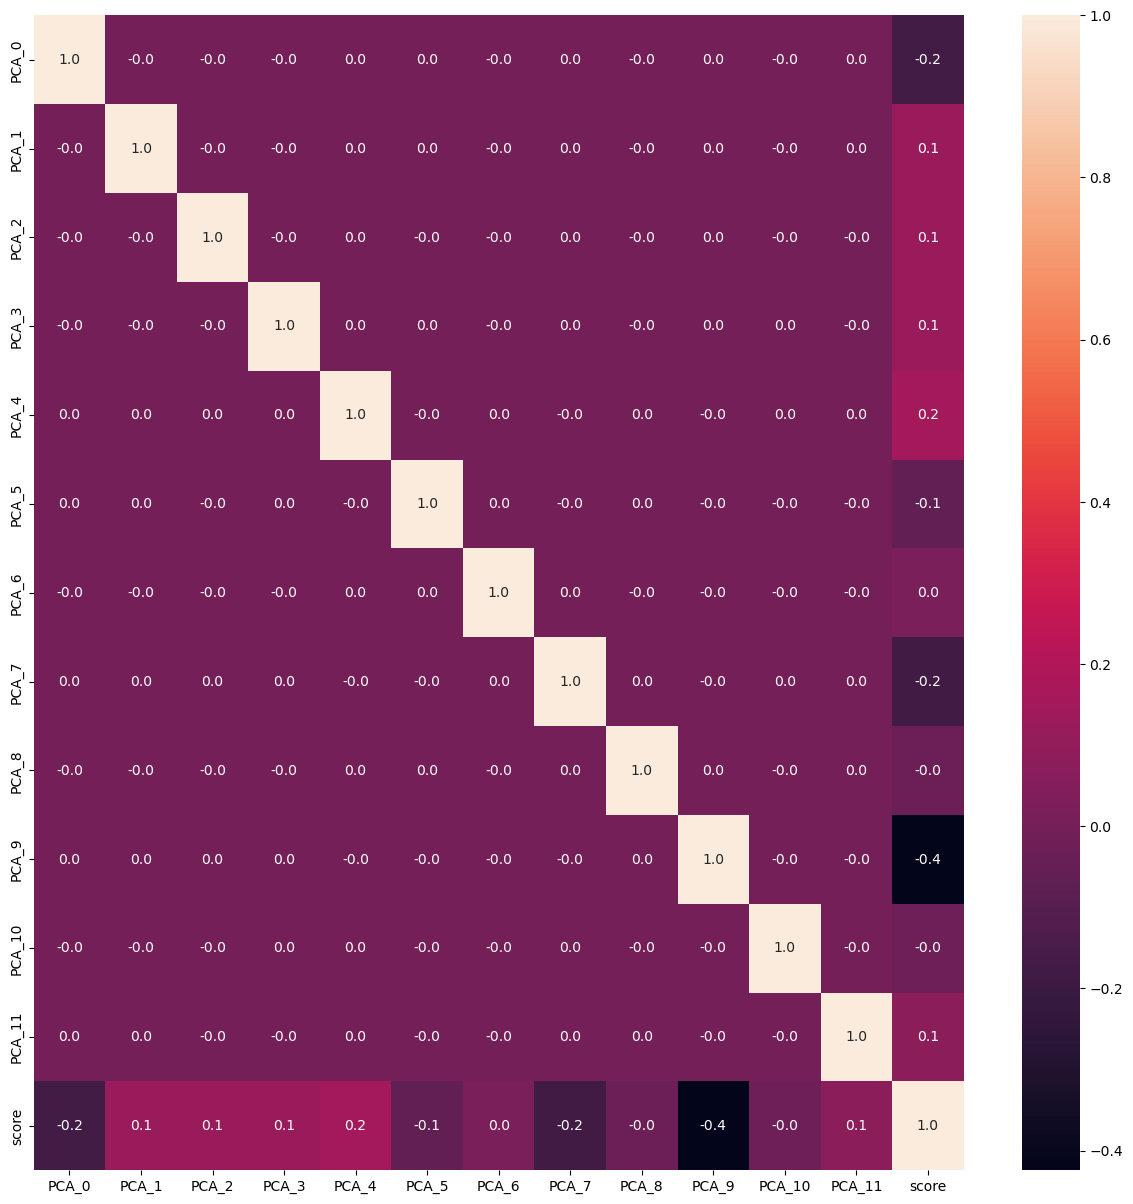

In [38]:
show_heatmap(data_pca, figsize=(15, 15))

In [39]:
avg_correlation(data_pca)

[('PCA_9', 0.10956834738641803),
 ('PCA_7', 0.09038349070856086),
 ('PCA_0', 0.08995306835814312),
 ('PCA_4', 0.08884931684075931),
 ('PCA_1', 0.08661751798955188),
 ('PCA_2', 0.08649796816565242),
 ('PCA_3', 0.0863583093187618),
 ('PCA_11', 0.08251831369344508),
 ('PCA_5', 0.08211802478084869),
 ('PCA_8', 0.07951045665531628),
 ('PCA_10', 0.07870580236946687),
 ('PCA_6', 0.07833950748896762)]

In [40]:
data_pca.corrwith(data_pca[target_col]).abs().sort_values(ascending = False)

score     1.000000
PCA_9     0.424389
PCA_7     0.174985
PCA_0     0.169390
PCA_4     0.155041
PCA_1     0.126028
PCA_2     0.124474
PCA_3     0.122658
PCA_11    0.072738
PCA_5     0.067534
PCA_8     0.033636
PCA_10    0.023175
PCA_6     0.018414
dtype: float64

<Axes: >

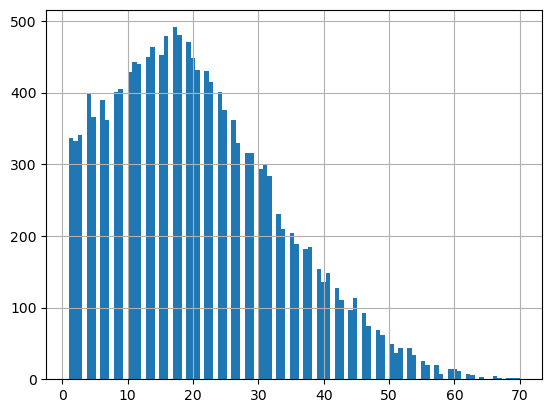

In [41]:
data[target_col].hist(bins = 100)

In [42]:
data[target_col].describe()

count    15362.000000
mean        20.597318
std         12.721862
min          1.000000
25%         11.000000
50%         19.000000
75%         29.000000
max         70.000000
Name: score, dtype: float64

In [43]:
num_cols = data_pca.columns.tolist()[:-1]
data_config = {
    'target': target_col,
    'features_idx': list(range(len(data_pca.columns)-1)),
    'split_col_idx': [9, 7],
    'ms_col_idx': [idx for idx in range(0, data_pca.shape[1]) if data_pca.columns[idx] in num_cols],
    'obs_col_idx': [6, 10],
    'num_cols': len(num_cols),
    'task_type': 'regression',
    'clf_type': 'none',
    'data_type': 'tabular',
    'client_split_indices': clients_split_indices.tolist()
}
print(data_config)

{'target': 'score', 'features_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'split_col_idx': [9, 7], 'ms_col_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'obs_col_idx': [6, 10], 'num_cols': 12, 'task_type': 'regression', 'clf_type': 'none', 'data_type': 'tabular', 'client_split_indices': [200, 291, 386, 598, 638, 695, 742, 855, 1015, 1197, 1412, 1525, 1550, 1584, 1694, 1817, 1920, 2102, 2209, 2346, 2432, 2477, 2623, 2824, 2860, 2927, 3073, 3141, 3278, 3529, 3621, 3810, 3990, 4093, 4258, 4377, 4522, 4595, 4829, 4934, 5074, 5174, 5303, 5443, 5478, 5676, 5851, 5987, 6163, 6209, 6300, 6457, 6507, 6657, 6841, 6906, 7060, 7148, 7224, 7405, 7479, 7647, 7741, 7872, 8053, 8101, 8165, 8340, 8386, 8448, 8588, 8837, 8918, 9034, 9064, 9086, 9195, 9252, 9326, 9407, 9557, 9664, 9724, 9807, 9899, 9999, 10115, 10211, 10341, 10388, 10448, 10599, 10654, 10683, 10846, 10981, 11071, 11181, 11360, 11432, 11475, 11630, 11703, 11862, 11977, 12084, 12153, 12236, 12270, 12399, 12611, 12662, 12782, 12820, 12945

In [44]:
data_pca.shape

(15362, 13)

In [45]:
data_pca[target_col] = data[target_col].astype(float)

In [46]:
data_pca.to_csv('./data/school/data_cleaned_pca.csv', index=False)
import json
with open('./data/school/data_config_pca.json', 'w') as f:
    json.dump(data_config, f)

array([[<Axes: title={'center': 'PCA_0'}>,
        <Axes: title={'center': 'PCA_1'}>,
        <Axes: title={'center': 'PCA_2'}>,
        <Axes: title={'center': 'PCA_3'}>],
       [<Axes: title={'center': 'PCA_4'}>,
        <Axes: title={'center': 'PCA_5'}>,
        <Axes: title={'center': 'PCA_6'}>,
        <Axes: title={'center': 'PCA_7'}>],
       [<Axes: title={'center': 'PCA_8'}>,
        <Axes: title={'center': 'PCA_9'}>,
        <Axes: title={'center': 'PCA_10'}>,
        <Axes: title={'center': 'PCA_11'}>],
       [<Axes: title={'center': 'score'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

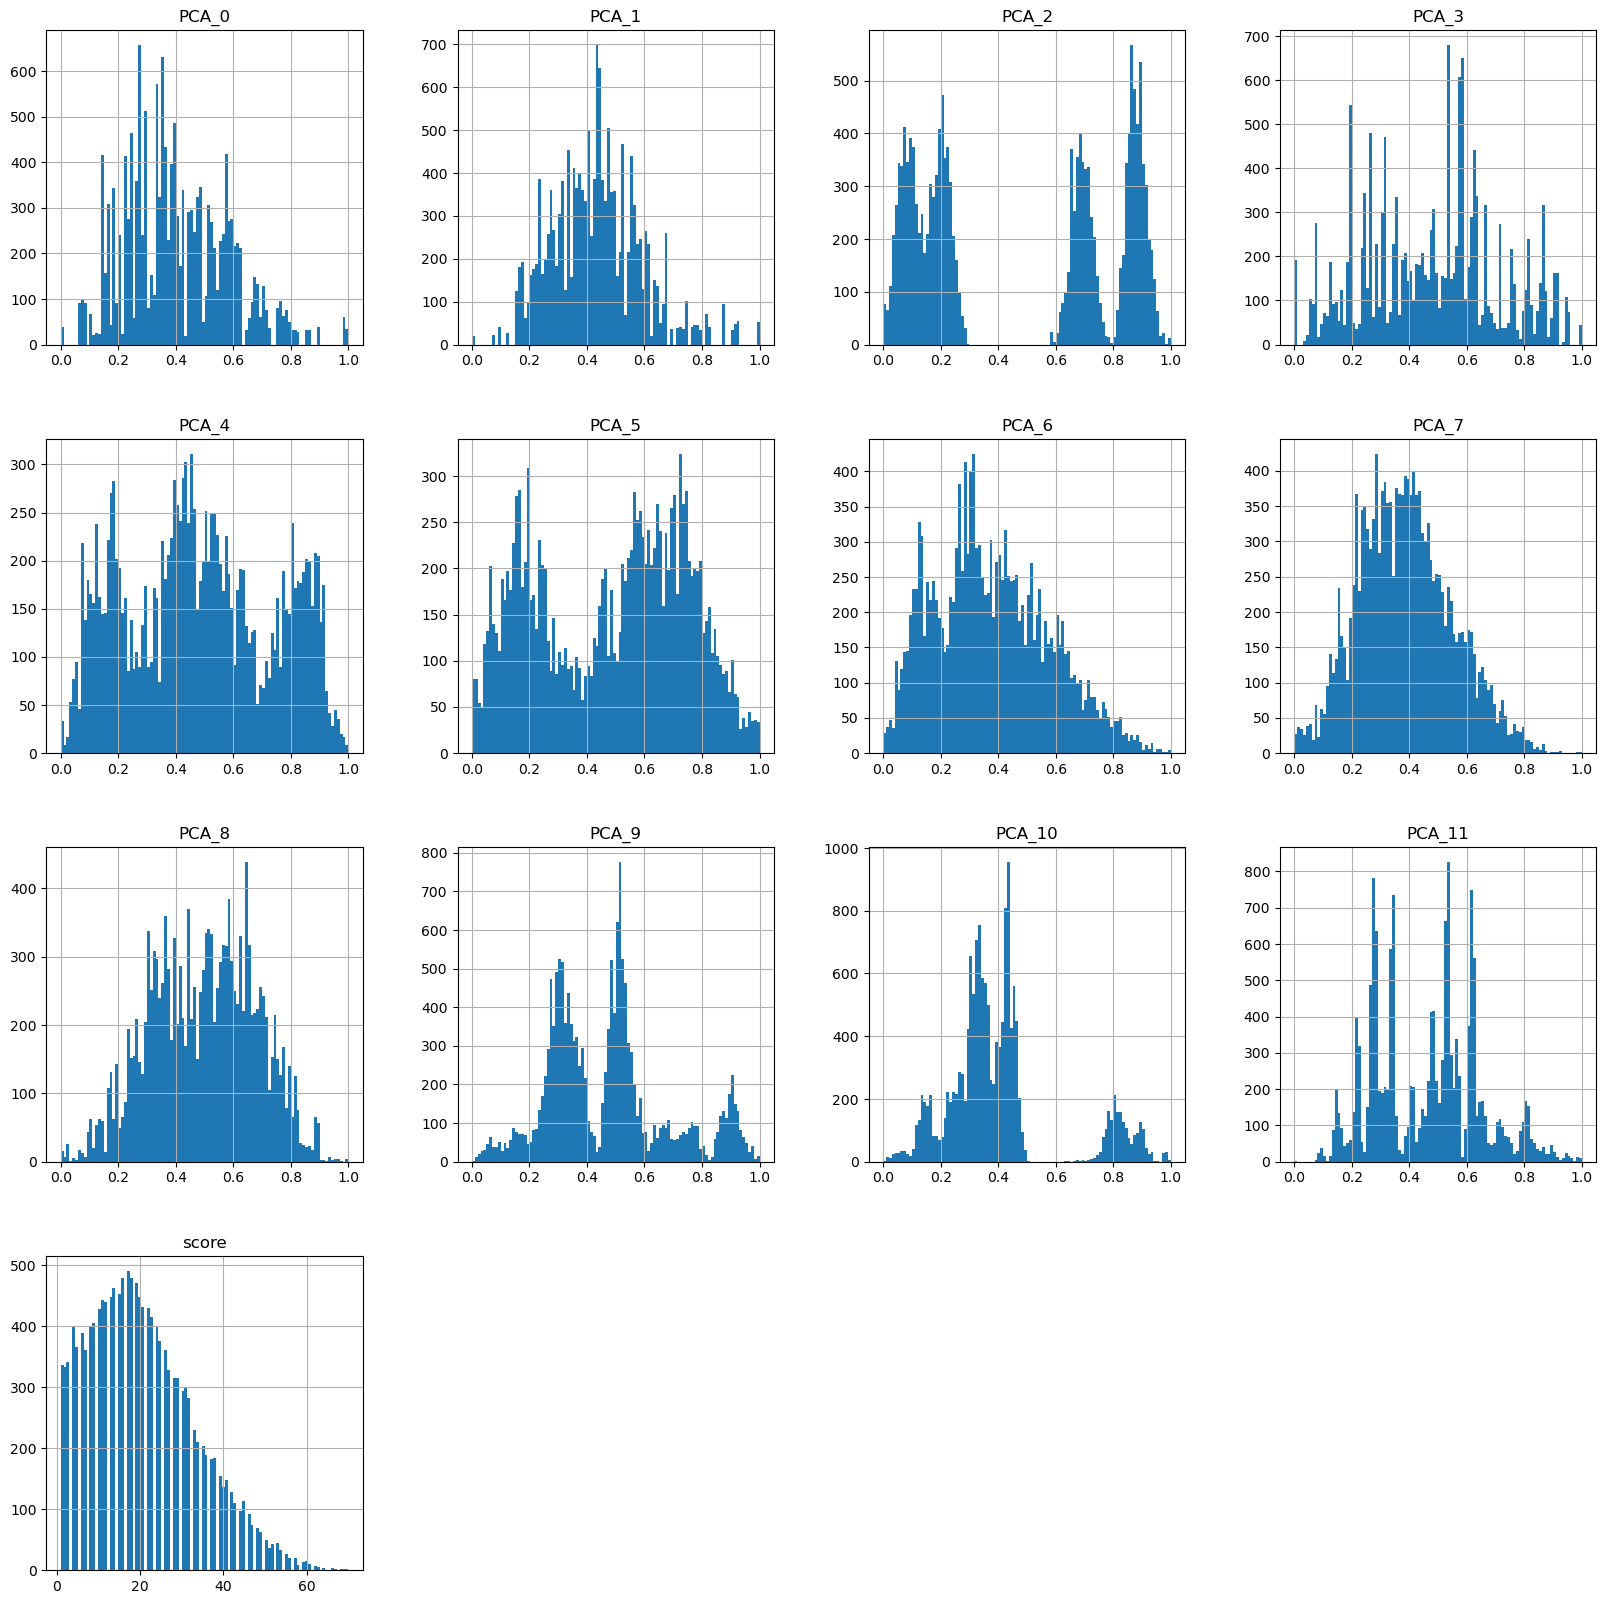

In [47]:
data_pca.hist(figsize=(20, 20), bins = 100)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop(columns = [target_col])
y = data[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

model = MLPRegressor(hidden_layer_sizes=(128, 128), max_iter=1000, alpha=0.5, random_state=42, verbose=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

Iteration 1, loss = 89.06299294
Iteration 2, loss = 75.02285776
Iteration 3, loss = 70.81678849
Iteration 4, loss = 63.94160669
Iteration 5, loss = 59.83577302
Iteration 6, loss = 58.15057889
Iteration 7, loss = 57.04980571
Iteration 8, loss = 56.06168331
Iteration 9, loss = 55.63900132
Iteration 10, loss = 55.10882819
Iteration 11, loss = 55.78107640
Iteration 12, loss = 54.95849925
Iteration 13, loss = 55.05435955
Iteration 14, loss = 54.62128341
Iteration 15, loss = 54.38179266
Iteration 16, loss = 54.51548330
Iteration 17, loss = 54.66563868
Iteration 18, loss = 54.58290141
Iteration 19, loss = 53.87639140
Iteration 20, loss = 54.04717597
Iteration 21, loss = 54.76427920
Iteration 22, loss = 54.12281162
Iteration 23, loss = 54.00245021
Iteration 24, loss = 53.97655713
Iteration 25, loss = 54.14959012
Iteration 26, loss = 54.47532217
Iteration 27, loss = 53.89455649
Iteration 28, loss = 53.65094135
Iteration 29, loss = 54.11807374
Iteration 30, loss = 53.93873629
Iteration 31, loss 